# Techniques to handle imbalanced datasets

### 1. Oversampling
- The goal of oversampling is to artificially increase the size of the minority class so that the model can learn better from that class.

In [17]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=cluster_std, random_state=0)

In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

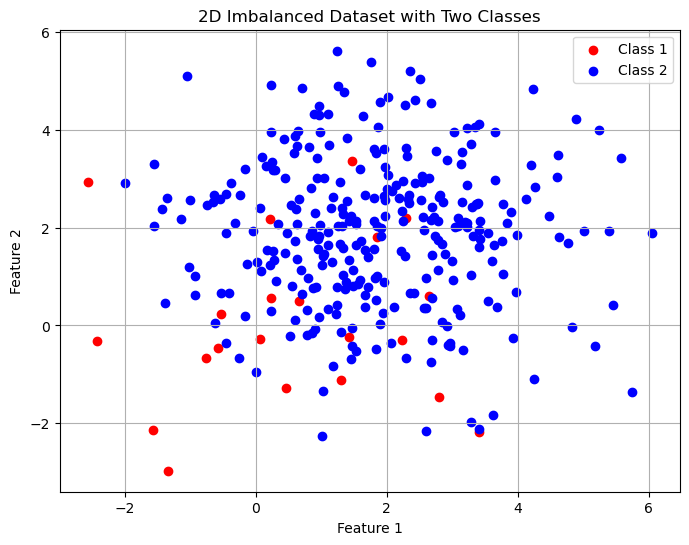

In [8]:
# Plotting before resampled
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

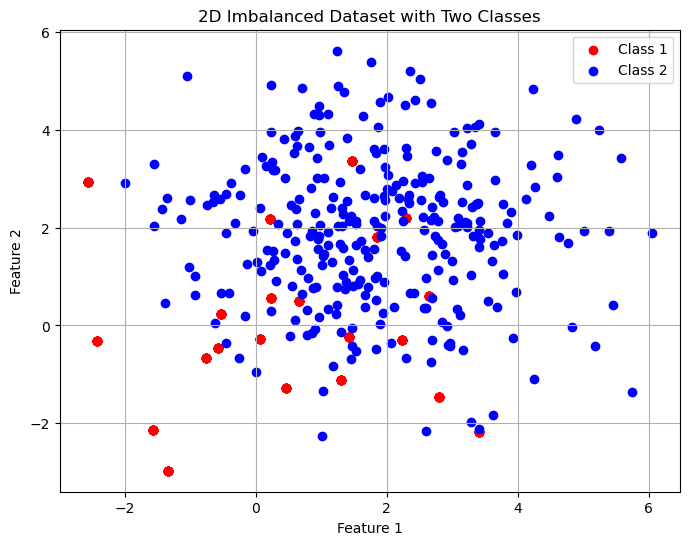

In [9]:
# Plotting after resampled
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

In [11]:
print('Shape of X features before resampling: ',X_train.shape)
print('Shape of X feature after resampling: ',X_resampled.shape)

Shape of X features before resampling:  (320, 2)
Shape of X feature after resampling:  (598, 2)


In [14]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [15]:
pd.Series(y_resampled).value_counts()

1    299
0    299
Name: count, dtype: int64

In [18]:
# Initialize and train RandomForest classifier on resampled data
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

LogisticRegression()

In [19]:
# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

In [20]:
# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



In [21]:
# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_ros))

ROC AUC Score (With Over Sampling): 0.950657894736842


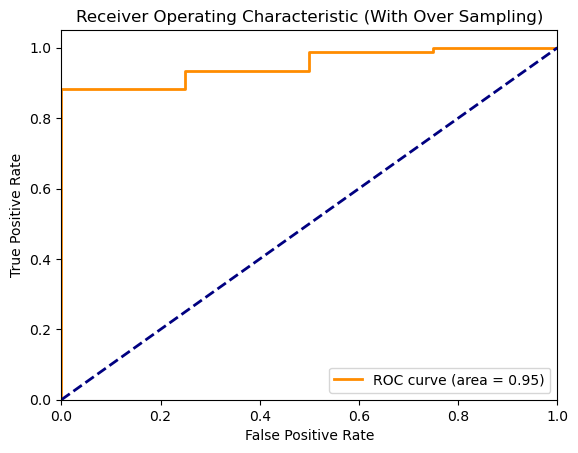

In [22]:
# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")

In [23]:
# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Over Sampling)")

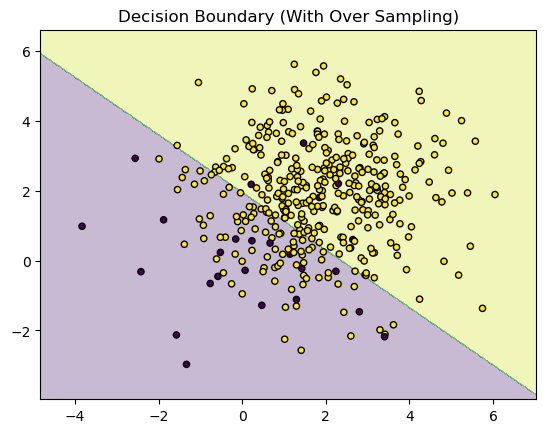

In [24]:
# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_ros)

### 2. SMOTE (Synthetic Minority Oversampling Technique)
- It is an oversampling technique.
- Here instead of duplicating the minority classes, it try to create synthetic data of the minority class

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

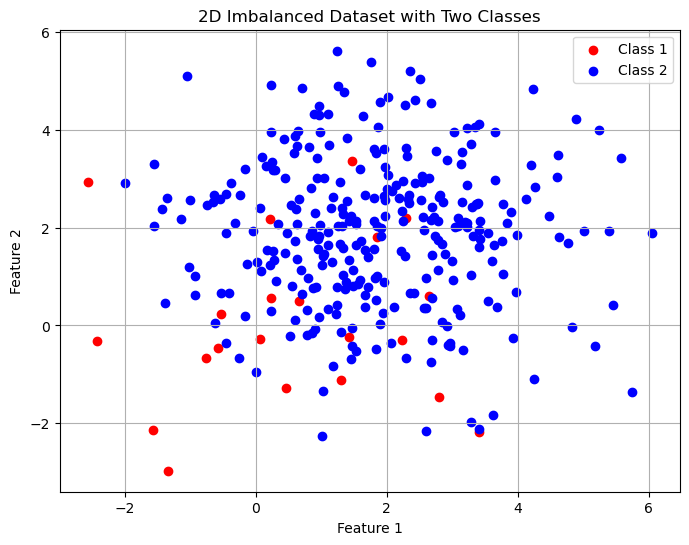

In [28]:
# Plotting before resampling
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

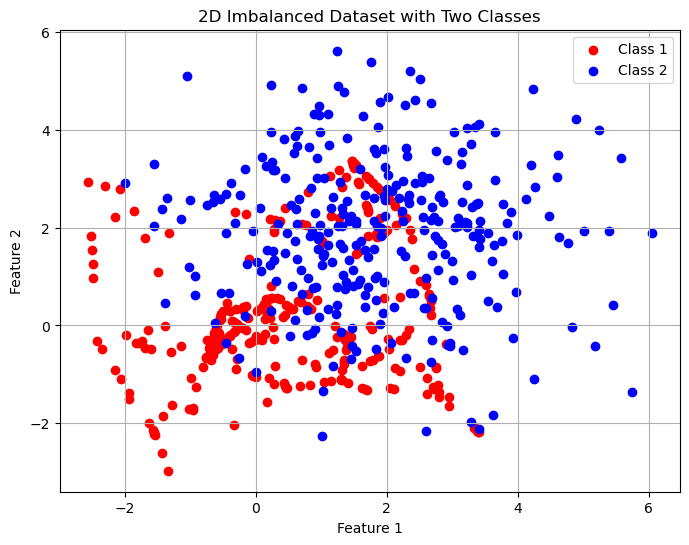

In [29]:
# Plotting after resampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True) 

In [30]:
X_train.shape

(320, 2)

In [31]:
X_resampled_smote.shape

(598, 2)

In [32]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [33]:
pd.Series(y_resampled_smote).value_counts()

1    299
0    299
Name: count, dtype: int64

In [34]:
# Initialize and train RandomForest classifier on resampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_resampled_smote, y_resampled_smote)

LogisticRegression()

In [35]:
# Predict test set
y_pred_smote = classifier_smote.predict(X_test)
y_proba_smote = classifier_smote.predict_proba(X_test)[:, 1]

In [36]:
# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_smote))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.17      1.00      0.30         4
           1       1.00      0.75      0.86        76

    accuracy                           0.76        80
   macro avg       0.59      0.88      0.58        80
weighted avg       0.96      0.76      0.83        80



In [37]:
# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_smote))

ROC AUC Score (With SMOTE): 0.950657894736842


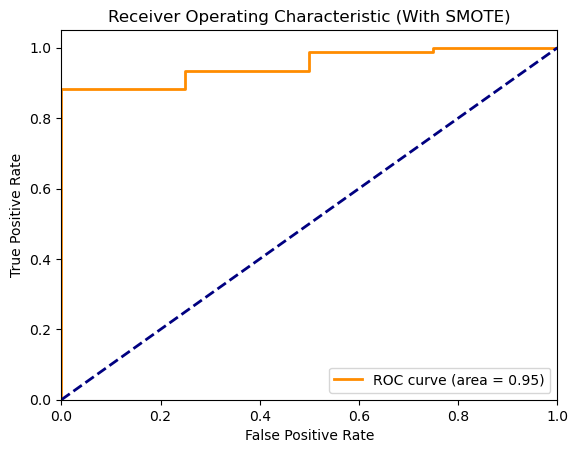

In [38]:
# Plotting ROC AUC Curve for SMOTE data
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")

In [39]:
# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With SMOTE)")

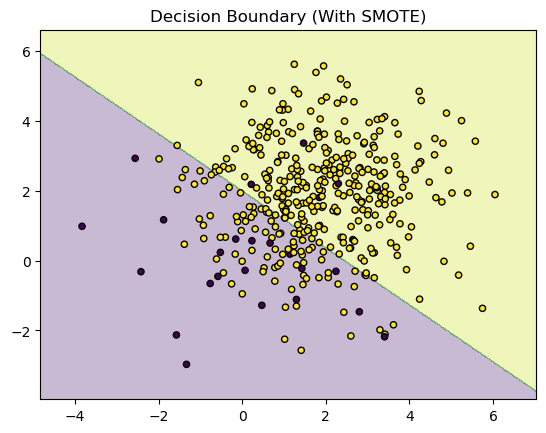

In [40]:
# Plot decision boundary for SMOTE data
plot_decision_boundaries_smote(X, y, classifier_smote)